In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [25]:
# Generate a synthetic dataset with a known mean and variance
np.random.seed(0)
true_mean = 5.0
true_variance = 2.0
sample_size = 100
data = np.random.normal(true_mean, np.sqrt(true_variance), sample_size)

In [26]:
# Define the likelihood function for a Gaussian distribution
def likelihood(data, mu, sigma):
    return np.prod(norm.pdf(data, mu, sigma))

# Define the log-likelihood function for a Gaussian distribution
def log_likelihood(data, mu, sigma):
    return np.sum(norm.logpdf(data, mu, sigma))

# Maximum Likelihood Estimation for the mean and variance 
estimated_mean = np.mean(data)
estimated_variance = np.var(data)

In [27]:
# Display the results
print("True Mean:", true_mean)
print("Estimated Mean:", estimated_mean)
print("True Variance:", true_variance)
print("Estimated Variance:", estimated_variance)

True Mean: 5.0
Estimated Mean: 5.084581306707489
True Variance: 2.0
Estimated Variance: 2.031653238429863


In [33]:
# Plot the likelihood function for the mean and variance
mu_values = np.linspace(0, 10, 400)
sigma_values = np.linspace(0.1, 5, 400)
likelihood_surface = np.zeros((len(mu_values), len(sigma_values)))

for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        likelihood_surface[i, j] = likelihood(data, mu, sigma)

Text(0.5, 1.0, 'Likelihood Function')

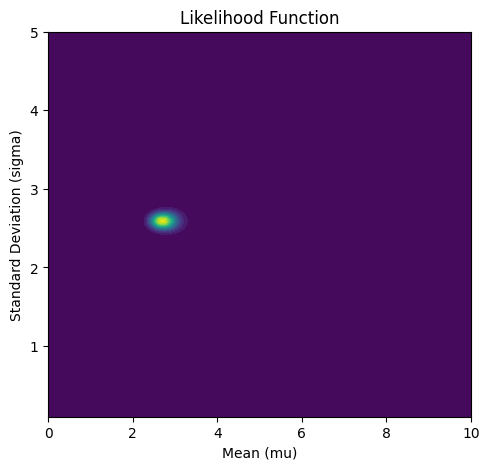

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(mu_values, sigma_values, likelihood_surface, levels=20, cmap="viridis")
plt.xlabel("Mean (mu)")
plt.ylabel("Standard Deviation (sigma)")
plt.title("Likelihood Function")

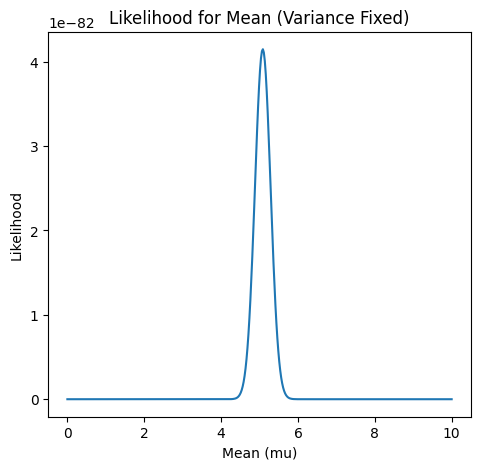

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(mu_values, [likelihood(data, mu, estimated_variance) for mu in mu_values])
plt.xlabel("Mean (mu)")
plt.ylabel("Likelihood")
plt.title("Likelihood for Mean (Variance Fixed)")

plt.show()

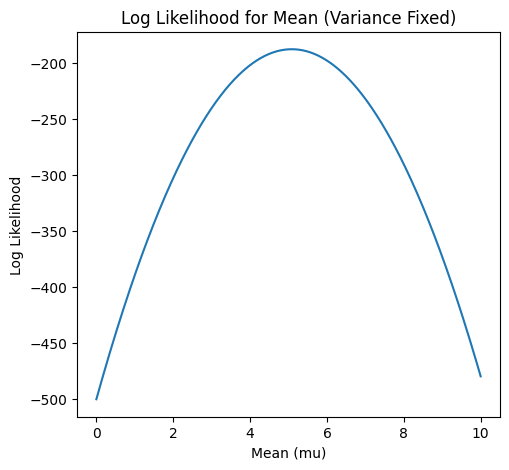

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(mu_values, [log_likelihood(data, mu, estimated_variance) for mu in mu_values])
plt.xlabel("Mean (mu)")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood for Mean (Variance Fixed)")

plt.show()